In [170]:
import os.path
import os as op
from github import Github
from base64 import decodebytes as dcd

TIMESTAMP = '@{:%Y-%m-%d %H:%M}'

# LOCAL_FOLDER = os.path.abspath(os.path.join(os.path.dirname(__file__), '../model/git/spg'))
REMOTE_URL = "https://github.com/SuPyPackage/SuPyGirls.git"
USERNAME = "kwarwp"
# PASSWORD = dcd(str.encode(op.environ["IKW"])).decode("utf-8")
TOKEN = dcd(str.encode(op.environ["IKT"])).decode("utf-8")


class DataSource:
    def __init__(self):
        # g = Github(USERNAME, PASSWORD)
        g = Github(TOKEN)
        g.get_user("kwarwp")
        self.user = g.get_user("kwarwp")
        self.repo = None

    def get_file_branched(self, project, packager, moduler="main.py"):
        self.repo = self.user.get_repo(project)
        self.repo.get_branches()
        ref = self.repo.get_branch(packager).commit.sha
        return self.repo.get_file_contents("{}/{}".format(packager, moduler), ref)

    def get_file_contents(self, project, packager, moduler="main.py"):
        self.repo = self.user.get_repo(project)
        path = "{}/{}" if packager else "{}{}"
        print("get_file_contents ", project, path.format(packager, moduler))
        return self.repo.get_file_contents(path.format(packager, moduler))

ds = DataSource()
code_file = ds.get_file_contents("vera","alexa","__score__.py")
code = dcd(str.encode(code_file.content)).decode("utf-8")
code = "[["+"],\n[{".join(code.split(",\n{"))[1:-2]+"]]"


get_file_contents  vera alexa/__score__.py


In [171]:
json = code
from json import loads
json = json.replace("'", '"')
# json = json.replace('"tempo": ', '"tempo": "')
# json = json.replace("}", '"}')
json = json.replace("(", '[')
json = json.replace(")", ']')
json = json.replace("True", 'true')
json = json.replace("False", 'false')
# json = "[" + "[".join(json.split("[")[1:])
# print(json)
all_data = loads(json)


In [172]:
VL = ('G', 'C', 'f', 'p', 'b', 'e', 'c')
CT = ('f', 'b', 'p', 'c', 'e', 'ma', 'pa', 'pe', 'co', 'la', 'bo', 'ga', 'te')
PT = ('OK', False, True)
data = all_data[1][1:]
tm = [(
    (d["tempo"]-data[0]["tempo"])/50,
    ord(d["move"][0])-ord("B"),
    d["casa"][1]*2/500+d["casa"][0]/1000 if d["casa"][0] != "h" else 4,
    VL.index(d["valor"][0]),CT.index(d["carta"][0:2])/3, PT.index(d["ponto"])) for d in data]
# print(tm)
tm, mv, cs, vl, ct, pt= zip(*tm)
print(tm, mv, cs, vl, ct, pt)
print(sorted(list(CT)))

(0.0, 992.88, 1170.82, 1290.08, 1656.08, 1672.92, 2035.9, 2540.52, 2555.92, 3563.52, 4259.52, 4282.72, 4910.88, 5494.4, 6796.5, 6999.2, 7014.08, 7029.34, 7044.52, 8598.12, 8935.04, 9093.9, 9644.66, 9829.16, 9845.02, 9859.94, 10718.88, 11514.5, 12136.62, 12668.76, 12875.94, 13302.28) (1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1) (2.158, 2.077, 2.234, 2.217, 2.159, 2.159, 2.246, 2.3930000000000002, 2.174, 1.8800000000000001, 2.078, 2.078, 2.017, 2.046, 1.847, 1.941, 1.941, 1.941, 1.921, 0.956, 2.204, 2.301, 2.329, 2.063, 2.062, 2.062, 1.989, 1.845, 2.029, 1.017, 2.303, 0.7090000000000001) (0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 3, 3, 4, 0, 0, 0, 0, 1, 2, 0, 6, 0, 0, 0, 5, 4, 5, 1, 6, 1) (0.0, 0.6666666666666666, 1.0, 0.0, 0.0, 0.0, 3.0, 0.6666666666666666, 0.6666666666666666, 0.3333333333333333, 0.6666666666666666, 0.6666666666666666, 4.0, 2.0, 2.6666666666666665, 1.3333333333333333, 1.3333333333333333, 1.3333333333333333, 1.333333333333333

In [173]:
dtm = [d1-d0 for d0, d1 in zip(tm, tm[1:])]
print(dtm)

[992.88, 177.93999999999994, 119.25999999999999, 366.0, 16.840000000000146, 362.98, 504.6199999999999, 15.400000000000091, 1007.5999999999999, 696.0000000000005, 23.199999999999818, 628.1599999999999, 583.5199999999995, 1302.1000000000004, 202.69999999999982, 14.88000000000011, 15.260000000000218, 15.180000000000291, 1553.6000000000004, 336.9200000000001, 158.85999999999876, 550.7600000000002, 184.5, 15.860000000000582, 14.920000000000073, 858.9399999999987, 795.6200000000008, 622.1200000000008, 532.1399999999994, 207.1800000000003, 426.34000000000015]


In [174]:
dtm = [(d1-d0)/1000 for d0, d1 in zip(dtm, dtm[1:])]
print(dtm)

[-0.8149400000000001, -0.05867999999999995, 0.24674000000000001, -0.34915999999999986, 0.3461399999999999, 0.14163999999999988, -0.4892199999999998, 0.9921999999999999, -0.31159999999999943, -0.6728000000000006, 0.60496, -0.044640000000000325, 0.7185800000000009, -1.0994000000000006, -0.1878199999999997, 0.00038000000000010915, -7.999999999992724e-05, 1.5384200000000001, -1.2166800000000002, -0.1780600000000013, 0.39190000000000147, -0.3662600000000002, -0.16863999999999943, -0.0009400000000005093, 0.8440199999999987, -0.06331999999999789, -0.1735, -0.08998000000000138, -0.32495999999999914, 0.21915999999999985]


In [175]:
def plot(nome, data):
    tm = [(
    (d["tempo"]-data[0]["tempo"])/50,
    ord(d["move"][0])-ord("B"),
    d["casa"][1]*2/500+d["casa"][0]/1000 if d["casa"][0] != "h" else 4,
    VL.index(d["valor"][0]),CT.index(d["carta"][0:2])/3, PT.index(d["ponto"])) for d in data]
    tm, mv, cs, vl, ct, pt= zip(*tm)
    acertos = sum(1 for p in pt if p >1)
    erros = sum(1 for p in pt if p ==1)
    dtm = [d1-d0 for d0, d1 in zip(tm, tm[1:])]
    dtm = [(d1-d0)/500 for d0, d1 in zip(dtm, dtm[1:])]
    from matplotlib import pyplot as plt
    x, y = zip(*[(x, y) for x, y in enumerate(dtm)])
    x1, y1 = zip(*[(x, y) for x, y in enumerate(mv)])
    x2, y2 = zip(*[(x, y) for x, y in enumerate(cs)])
    x3, y3 = zip(*[(x, y) for x, y in enumerate(vl)])
    x4, y4 = zip(*[(x, y) for x, y in enumerate(ct)])
    x5, y5 = zip(*[(x, y) for x, y in enumerate(pt)])
    _ = plt.figure(figsize=(20,10))
    _ = plt.plot(x, y, label="aceleração",linewidth=4.0)
    _ = plt.plot(x1, y1, label="operação",linewidth=5.0)
    _ = plt.plot(x2, y2, label="quadrante",linewidth=6.0)
    _ = plt.plot(x3, y3, label="observação",linewidth=5.5)
    _ = plt.plot(x4, y4, label="açao",linewidth=6.5)
    _ = plt.plot(x5, y5, label="correção",linewidth=4.5)
    _  = plt.legend(prop={'size': 24})
    _ = plt.xlabel("tempo", fontsize=24)
    _ = plt.ylabel("variação", fontsize=24)
    _ = plt.title(f"Jogo do Parque - {nome} - acertos:{acertos} - erros:{erros}", fontsize=24)
    # _ = plt.savefig('ilha.png')
    plt.show()

In [176]:
def plot_data():
    alld = [(d[0]["carta"], d[1:]) for d in all_data if len(d[1:])> 1]
    for nome, data in alld:        
        yield plot(nome, data)
pl = plot_data()

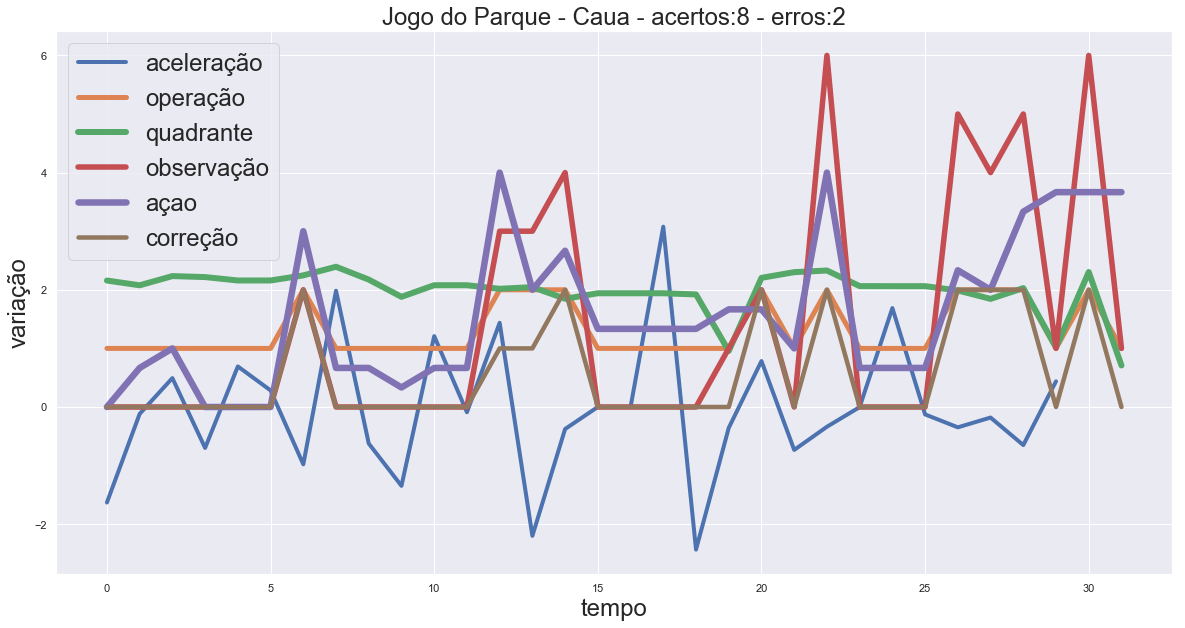

In [177]:
next(pl)

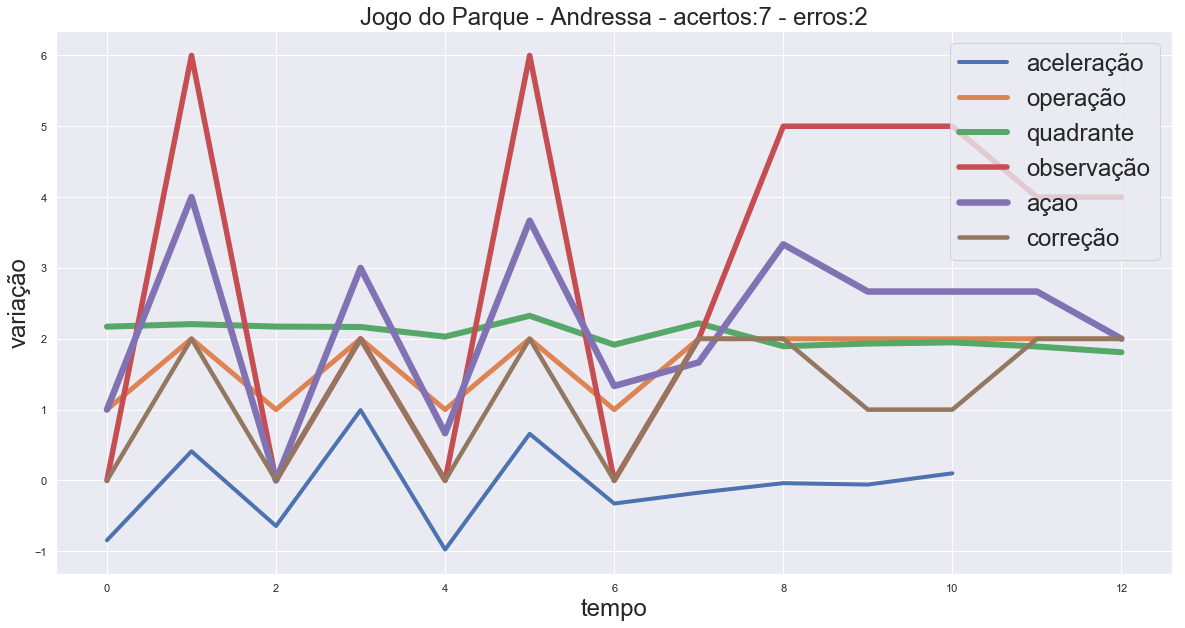

In [178]:
next(pl)

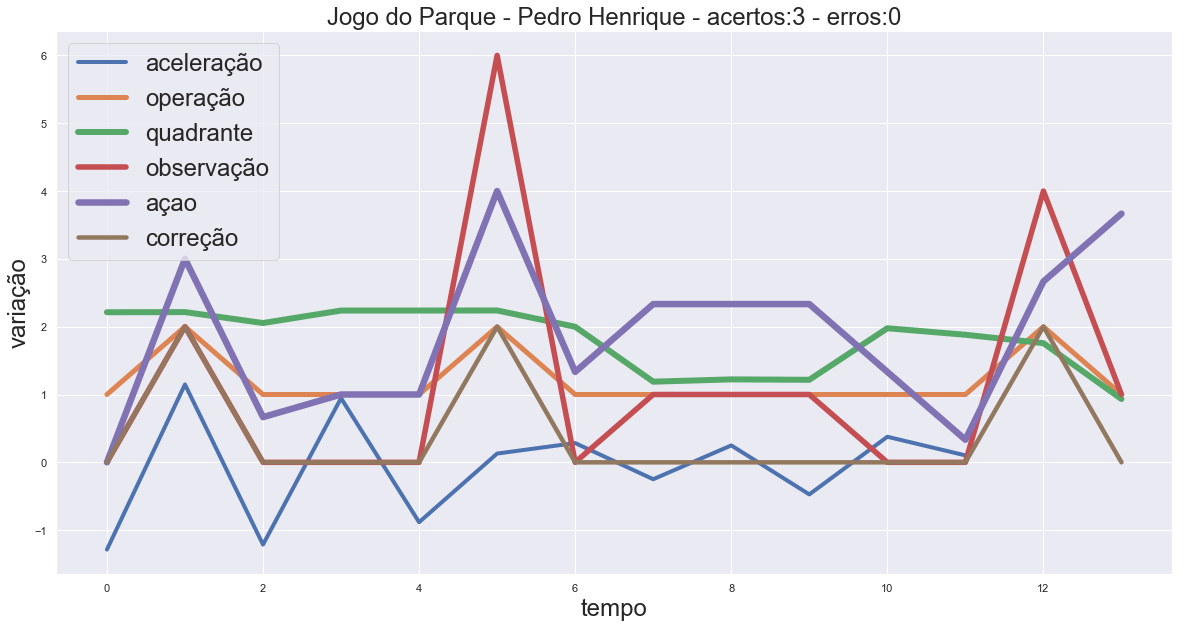

In [179]:
next(pl)

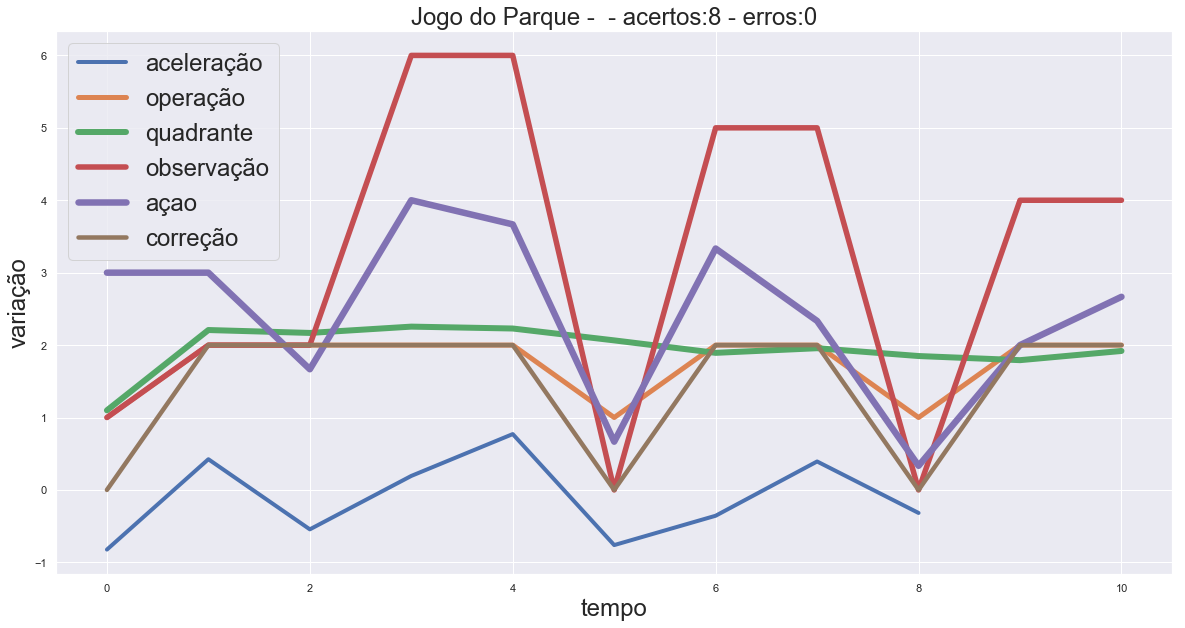

In [180]:
next(pl)

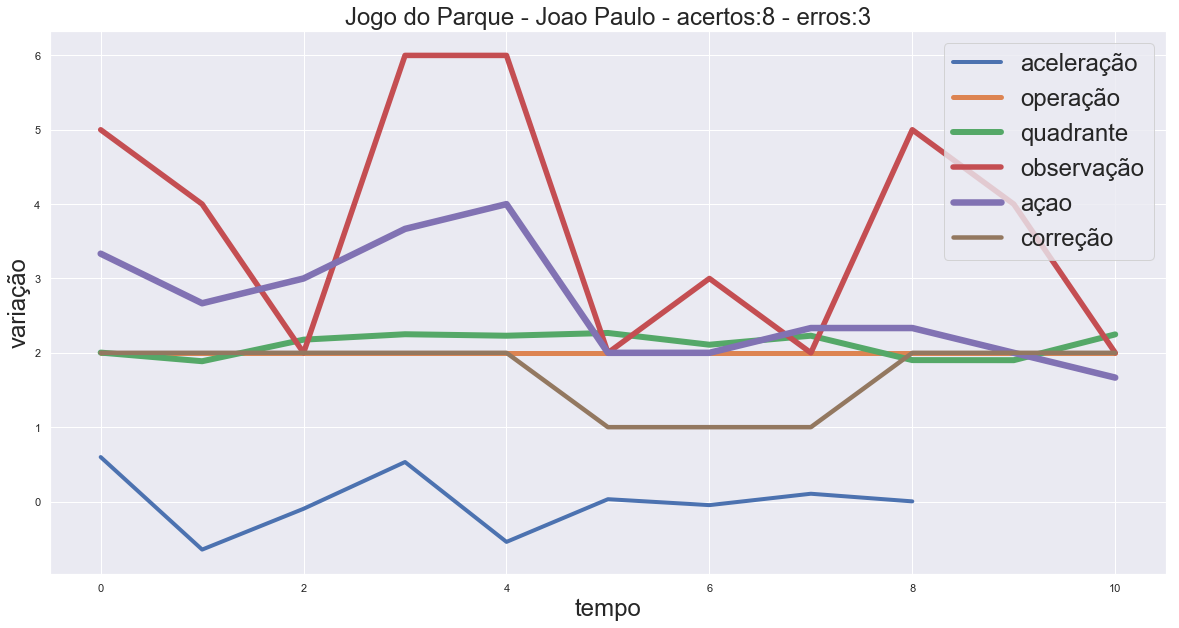

In [181]:
next(pl)

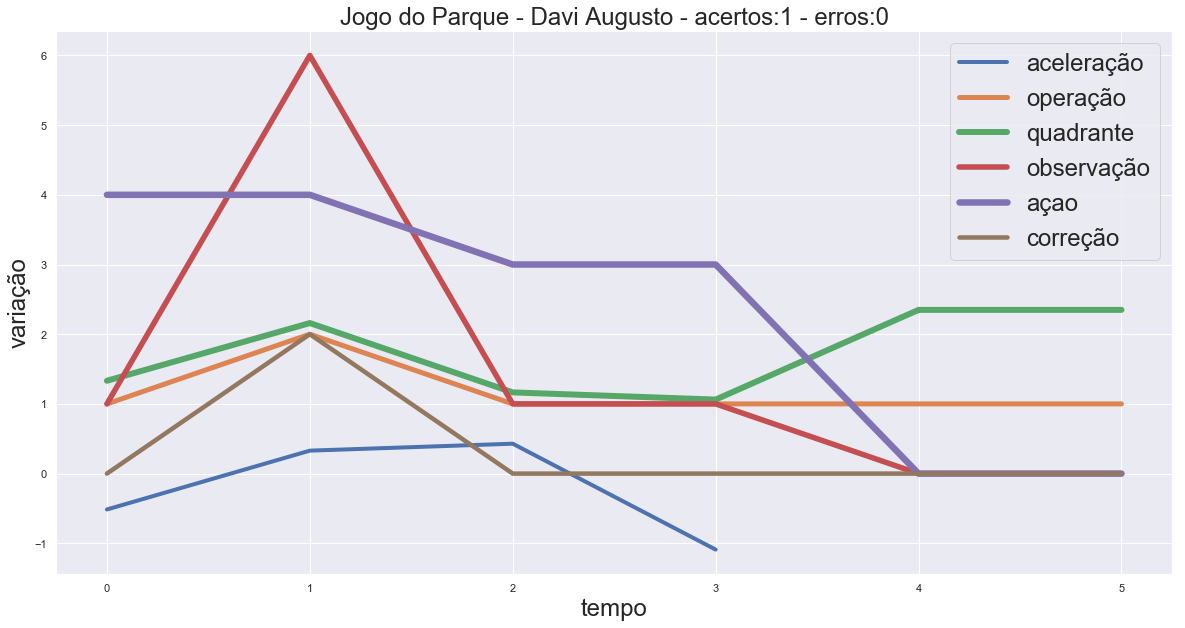

In [182]:
next(pl)

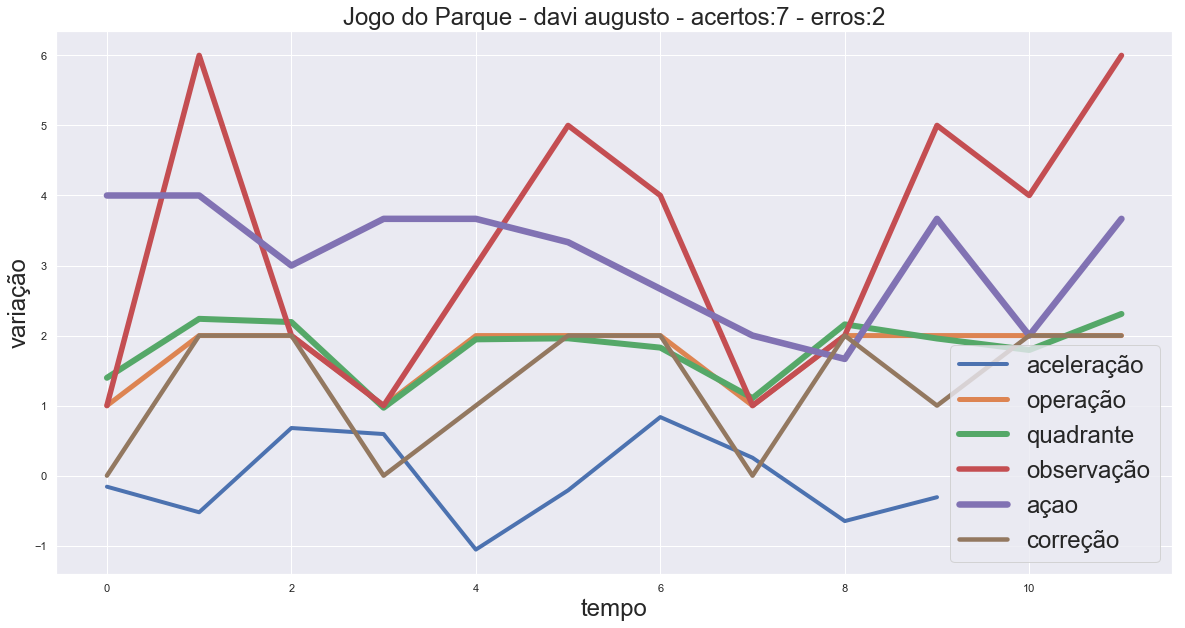

In [183]:
next(pl)

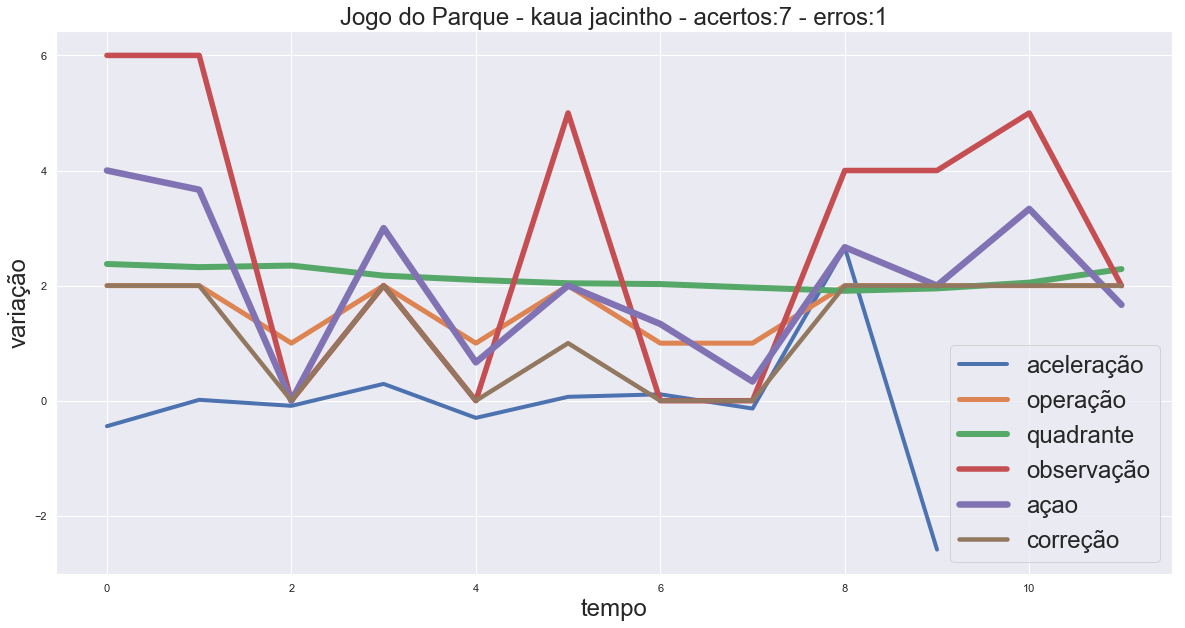

In [184]:
next(pl)

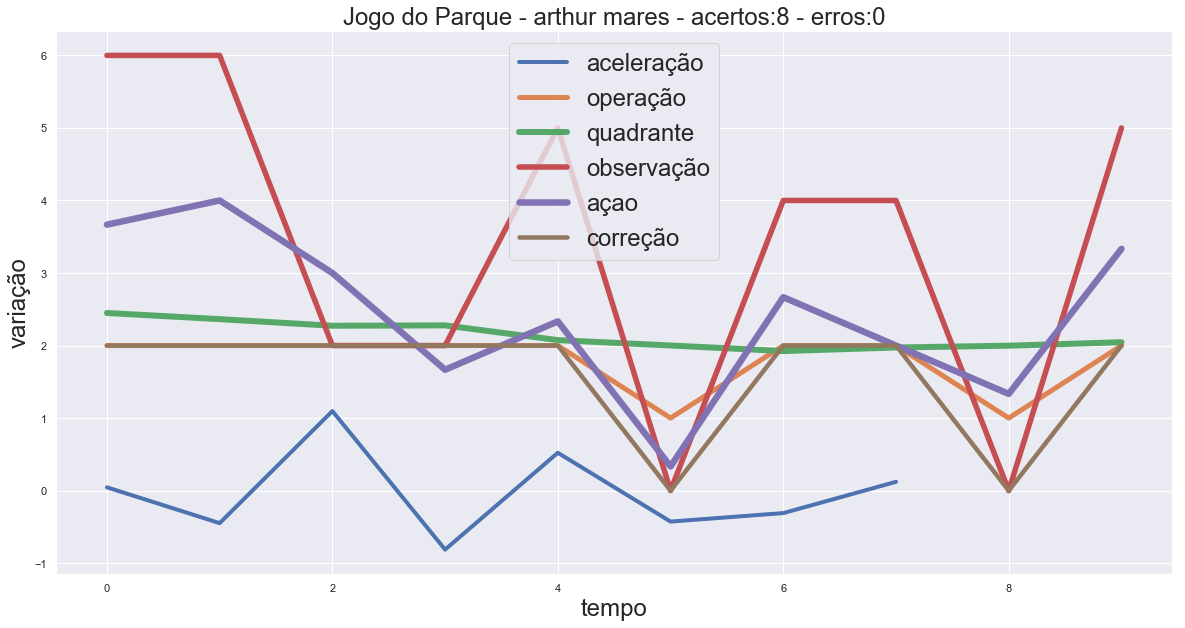

In [185]:
next(pl)

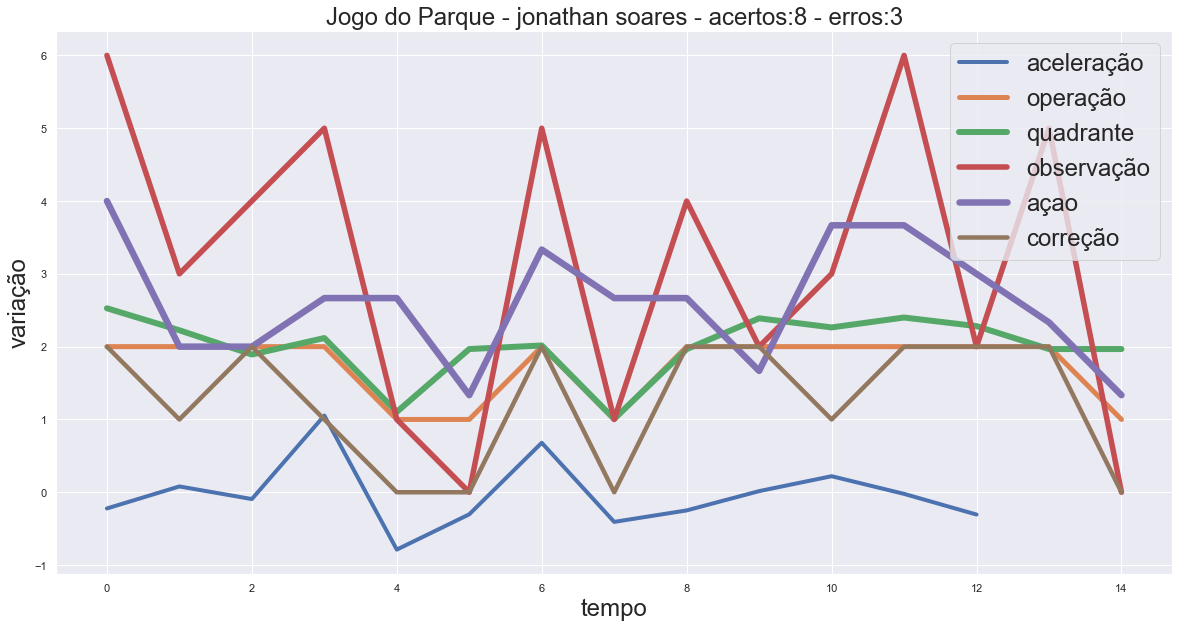

In [186]:
next(pl)

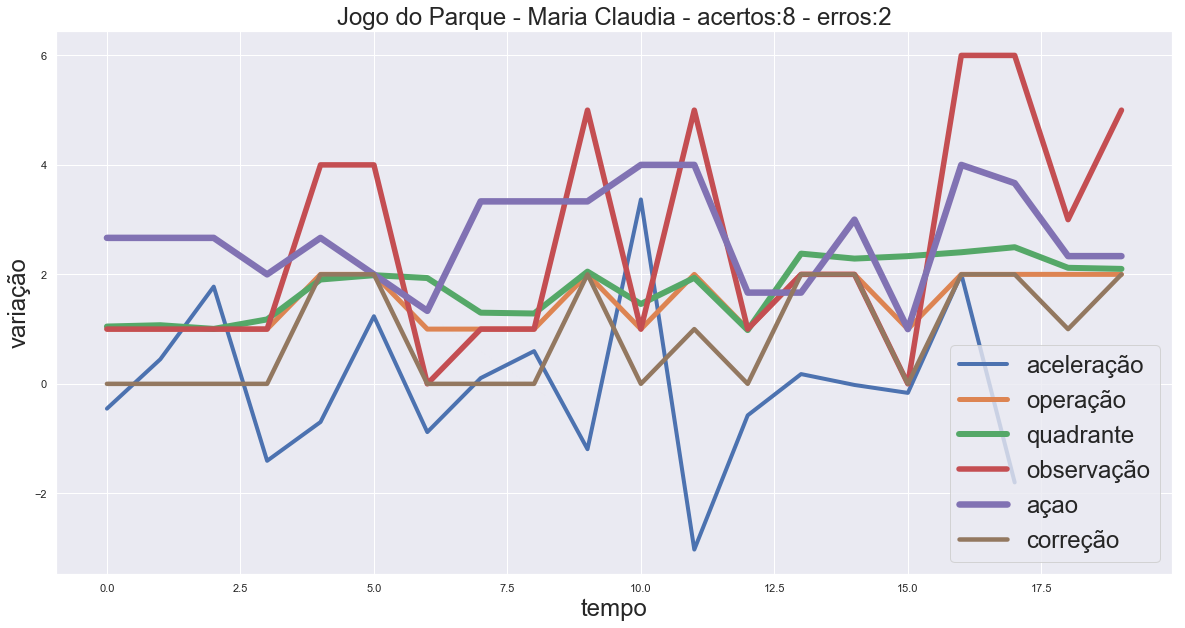

In [187]:
next(pl)

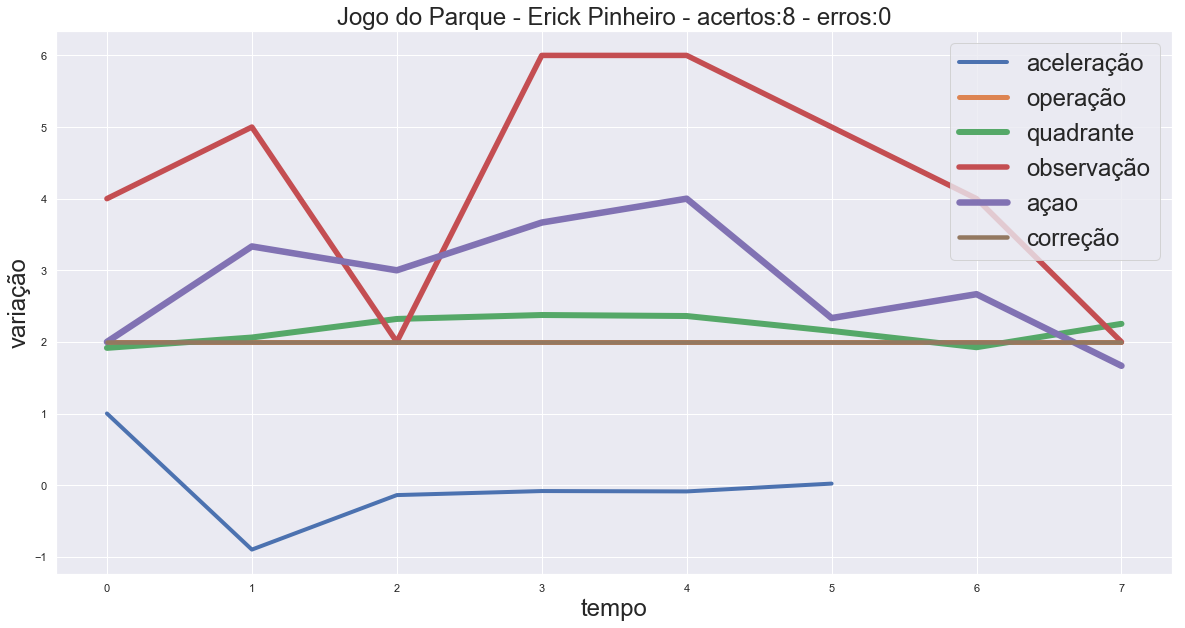

In [188]:
next(pl)

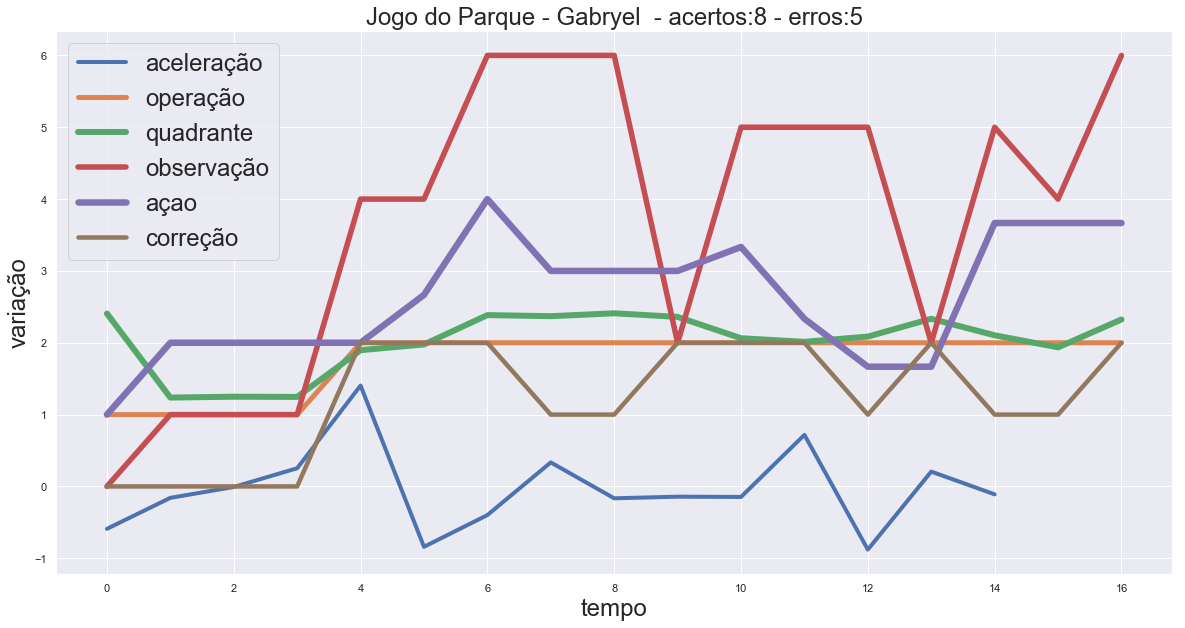

In [189]:
next(pl)

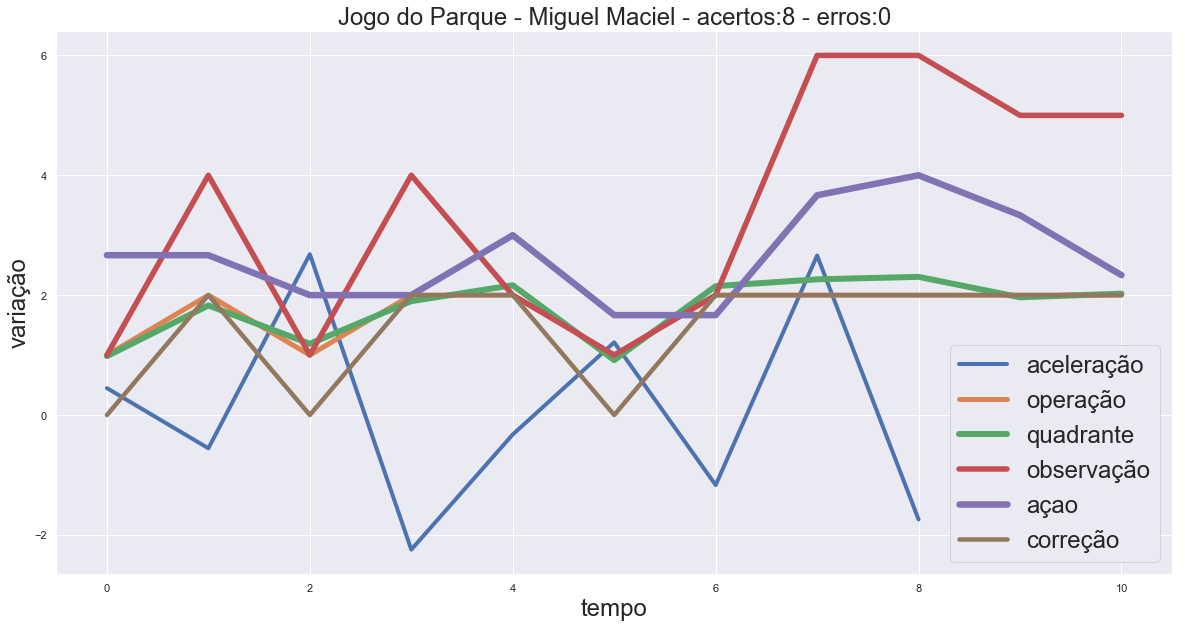

In [190]:
next(pl)

In [191]:
# COLUMNS = ["tempo","operação","quadrante","observação","açao","correção"]
COLUMNS = ["tempo","operação","quadrante","açao","correção"]
from pandas import DataFrame
def convert_data(data):
    converted_data = [(
        (d["tempo"]-data[0]["tempo"])/5000,
        ord(d["move"][0])-ord("B"),
#         (d["casa"][1]*2/500+d["casa"][0]/1000)/2 if d["casa"][0] != "h" else 4,
        VL.index(d["valor"][0])/2,CT.index(d["carta"][0:2])/3, PT.index(d["ponto"])) for d in data]
    return zip(* converted_data)
lines = {d[0]["carta"]: {campo: dados for campo, dados in zip(COLUMNS, convert_data(d[1:]))} 
         for d in all_data if len(d[1:])> 1}
# lines = {d[0]["carta"]: {dados[0]: dados[1:]dados in zip(*convert_data(d[1:]))} 
#          for d in all_data if len(d[1:])> 1}
[fields.update(velocidade=[
    (t0-t1)/4 for t0, t1 in zip(fields['tempo'], (fields['tempo'][0],0)+fields['tempo'][1:])])
 for user, fields in lines.items()]
[fields.update(acelera=[
    t0-t1 for t0, t1 in zip(fields['velocidade'], [0,fields['velocidade'][1]]+fields['velocidade'][1:])])
 for user, fields in lines.items()]
[fields.pop('tempo') for fields in lines.values()]
cols = COLUMNS + ['velocidade', 'acelera']
# lines = {user: {f'{dados[0]:2.2f}': dados[1:] for dados in zip(*[kind_data[k] for k in cols])} for user, kind_data in lines.items()}
#          for d in all_data if len(d[1:])> 1}
print("demo:", list(lines.items())[0][0],list(list(lines.items())[0][1]))
dfz = {user: DataFrame(dt) for user, dt in lines.items()}
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
def vplot():
    for user, data in dfz.items():
        print(data.describe())
        yield sns.violinplot(data=data).set_title(user)
        
vp= vplot()

demo: Caua ['operação', 'quadrante', 'açao', 'correção', 'velocidade', 'acelera']


        operação  quadrante       açao   correção  velocidade    acelera
count  32.000000  32.000000  32.000000  32.000000   32.000000  32.000000
mean    1.312500   0.671875   1.583333   0.562500    1.039241  -0.044261
std     0.470929   1.004902   1.284035   0.877588    1.019107   1.418852
min     1.000000   0.000000   0.000000   0.000000    0.000000  -3.041700
25%     1.000000   0.000000   0.666667   0.000000    0.054025  -0.787350
50%     1.000000   0.000000   1.333333   0.000000    0.874875  -0.129150
75%     2.000000   1.125000   2.416667   1.250000    1.559075   0.565137
max     2.000000   3.000000   4.000000   2.000000    3.884000   3.846050


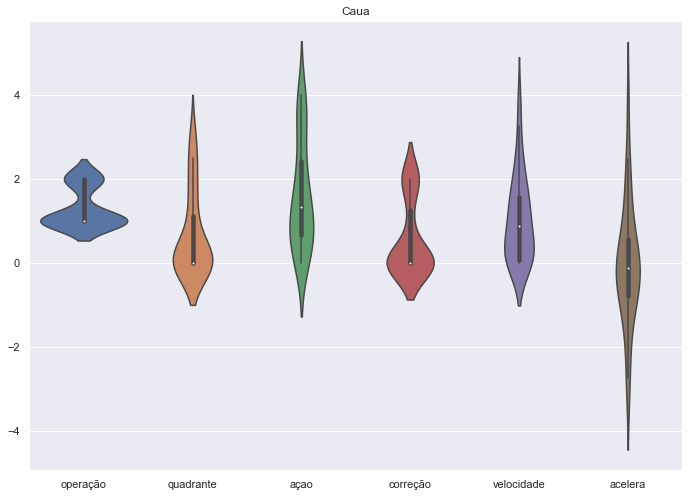

In [192]:
_ = next(vp)

        operação  quadrante       açao   correção  velocidade    acelera
count  13.000000  13.000000  13.000000  13.000000   13.000000  13.000000
mean    1.692308   1.500000   2.205128   1.230769    0.649627  -0.085773
std     0.480384   1.207615   1.213645   0.926809    0.488629   0.699685
min     1.000000   0.000000   0.000000   0.000000    0.000000  -1.219700
25%     1.000000   0.000000   1.333333   0.000000    0.330500  -0.407050
50%     2.000000   2.000000   2.666667   2.000000    0.456900  -0.047700
75%     2.000000   2.500000   3.000000   2.000000    1.030400   0.126400
max     2.000000   3.000000   4.000000   2.000000    1.571950   1.242700


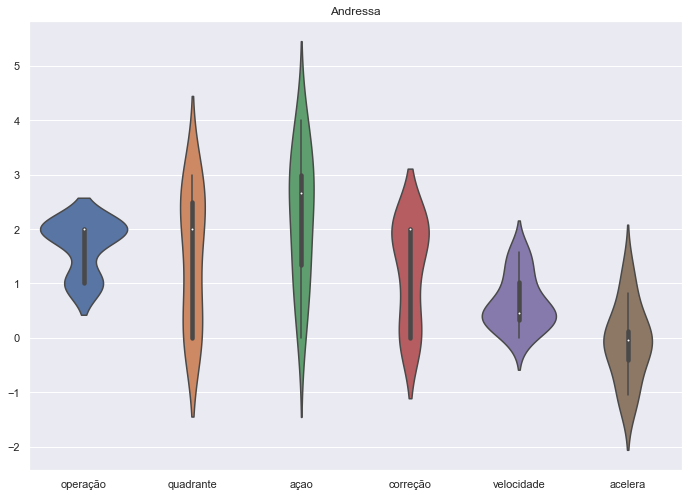

In [193]:
_ = next(vp)

        operação  quadrante       açao   correção  velocidade    acelera
count  14.000000  14.000000  14.000000  14.000000   14.000000  14.000000
mean    1.214286   0.571429   1.857143   0.428571    0.602207  -0.077496
std     0.425815   0.895655   1.231456   0.851631    0.571026   0.895019
min     1.000000   0.000000   0.000000   0.000000    0.000000  -1.608450
25%     1.000000   0.000000   1.000000   0.000000    0.162775  -0.521200
50%     1.000000   0.250000   1.833333   0.000000    0.463425   0.063975
75%     1.000000   0.500000   2.583333   0.000000    0.685262   0.344075
max     2.000000   3.000000   4.000000   2.000000    1.772200   1.435450


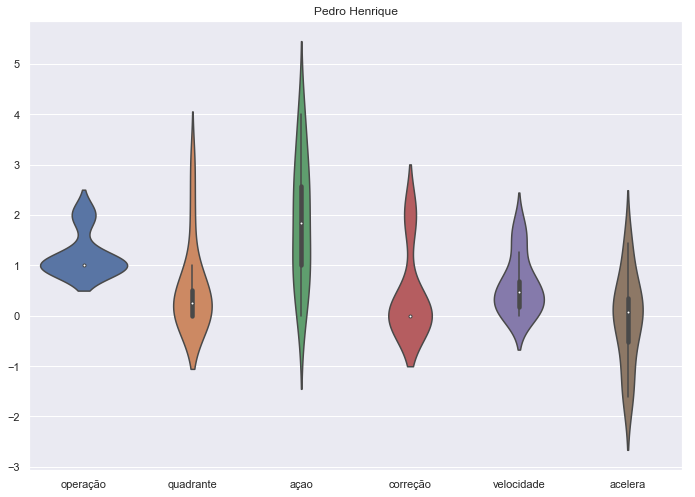

In [194]:
_ = next(vp)

        operação  quadrante       açao   correção  velocidade    acelera
count  11.000000  11.000000  11.000000  11.000000   11.000000  11.000000
mean    1.727273   1.590909   2.424242   1.454545    0.667518  -0.116114
std     0.467099   1.136182   1.174648   0.934199    0.519091   0.643993
min     1.000000   0.000000   0.333333   0.000000    0.000000  -1.029650
25%     1.500000   0.750000   1.833333   1.000000    0.313250  -0.562825
50%     2.000000   2.000000   2.666667   2.000000    0.603750   0.000000
75%     2.000000   2.500000   3.166667   2.000000    0.852050   0.366525
max     2.000000   3.000000   4.000000   2.000000    1.567850   0.964100


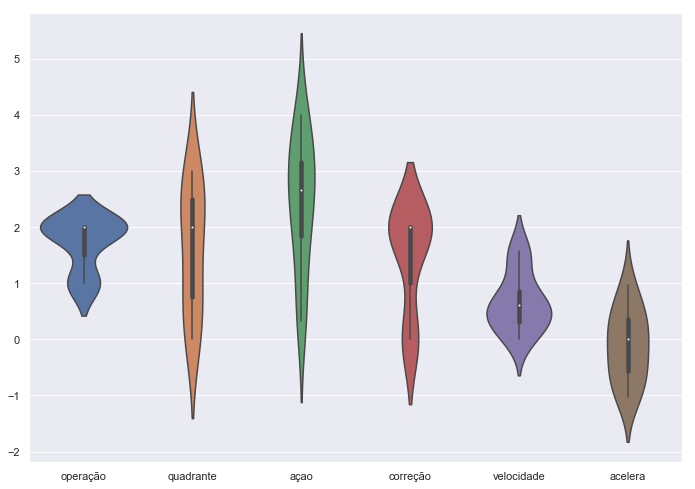

In [195]:
_ = next(vp)

       operação  quadrante       açao   correção  velocidade    acelera
count      11.0  11.000000  11.000000  11.000000   11.000000  11.000000
mean        2.0   1.863636   2.636364   1.727273    0.325141  -0.007623
std         0.0   0.809040   0.766733   0.467099    0.326139   0.463733
min         2.0   1.000000   1.666667   1.000000    0.000000  -0.808050
25%         2.0   1.000000   2.000000   1.500000    0.143875  -0.091150
50%         2.0   2.000000   2.333333   2.000000    0.246450   0.000000
75%         2.0   2.500000   3.166667   2.000000    0.302800   0.085100
max         2.0   3.000000   4.000000   2.000000    1.080750   0.747850


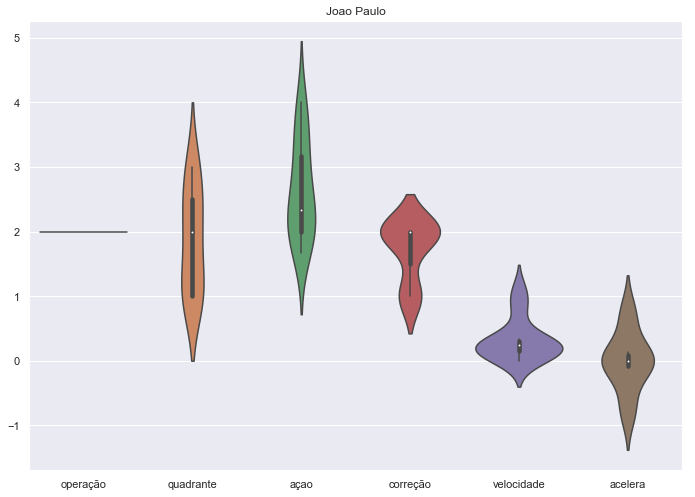

In [196]:
_ = next(vp)

       operação  quadrante      açao  correção  velocidade   acelera
count  6.000000   6.000000  6.000000  6.000000    6.000000  6.000000
mean   1.166667   0.750000  2.333333  0.333333    0.675867 -0.176467
std    0.408248   1.129159  1.861899  0.816497    0.582792  0.713001
min    1.000000   0.000000  0.000000  0.000000    0.000000 -1.363000
25%    1.000000   0.125000  0.750000  0.000000    0.182075 -0.482625
50%    1.000000   0.500000  3.000000  0.000000    0.699325  0.000000
75%    1.000000   0.500000  3.750000  0.000000    1.079062  0.308662
max    2.000000   3.000000  4.000000  2.000000    1.441250  0.536150


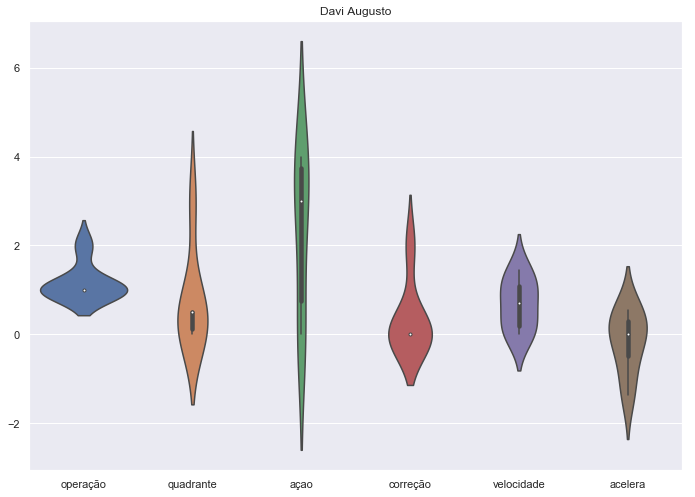

In [197]:
_ = next(vp)

        operação  quadrante       açao   correção  velocidade    acelera
count  12.000000  12.000000  12.000000  12.000000   12.000000  12.000000
mean    1.750000   1.666667   3.111111   1.333333    0.837946  -0.055704
std     0.452267   0.961375   0.832828   0.887625    0.573757   0.707932
min     1.000000   0.500000   1.666667   0.000000    0.000000  -1.319450
25%     1.750000   0.875000   2.500000   0.750000    0.379363  -0.451512
50%     2.000000   1.750000   3.500000   2.000000    0.849850  -0.098450
75%     2.000000   2.500000   3.666667   2.000000    1.142238   0.425450
max     2.000000   3.000000   4.000000   2.000000    1.833150   1.045550


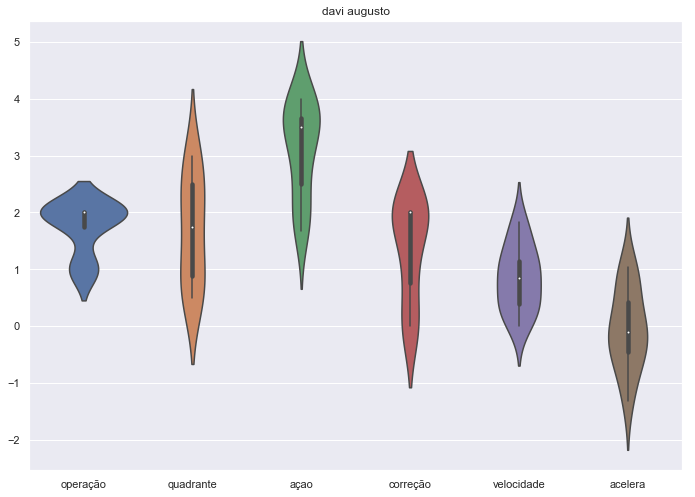

In [198]:
_ = next(vp)

        operação  quadrante       açao   correção  velocidade    acelera
count  12.000000  12.000000  12.000000  12.000000   12.000000  12.000000
mean    1.666667   1.416667   2.055556   1.250000    0.493883  -0.041779
std     0.492366   1.221648   1.316817   0.965307    0.952342   1.419457
min     1.000000   0.000000   0.000000   0.000000    0.000000  -3.233400
25%     1.000000   0.000000   1.166667   0.000000    0.113512  -0.220563
50%     2.000000   1.500000   2.000000   2.000000    0.179100   0.000000
75%     2.000000   2.500000   3.083333   2.000000    0.332437   0.098288
max     2.000000   3.000000   4.000000   2.000000    3.454400   3.329100


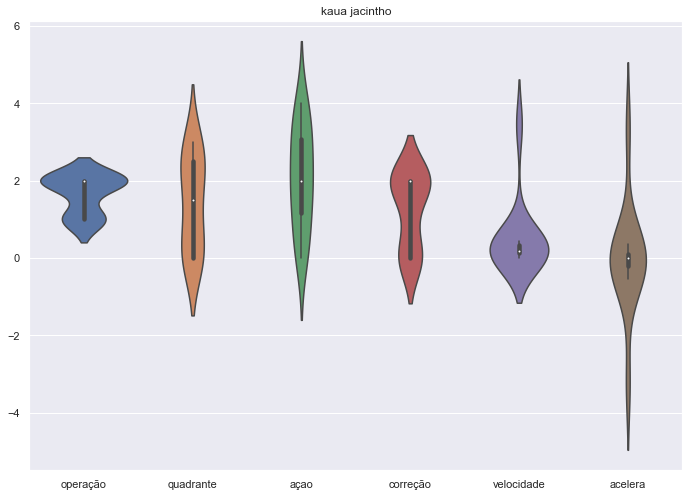

In [199]:
_ = next(vp)

        operação  quadrante       açao   correção  velocidade    acelera
count  10.000000  10.000000  10.000000  10.000000   10.000000  10.000000
mean    1.800000   1.700000   2.433333   1.600000    0.733850  -0.026495
std     0.421637   1.135292   1.133660   0.843274    0.486280   0.675427
min     1.000000   0.000000   0.333333   0.000000    0.000000  -1.016200
25%     2.000000   1.000000   1.750000   2.000000    0.429363  -0.496912
50%     2.000000   2.000000   2.500000   2.000000    0.719125   0.000000
75%     2.000000   2.500000   3.250000   2.000000    0.850838   0.127900
max     2.000000   3.000000   4.000000   2.000000    1.675800   1.371000


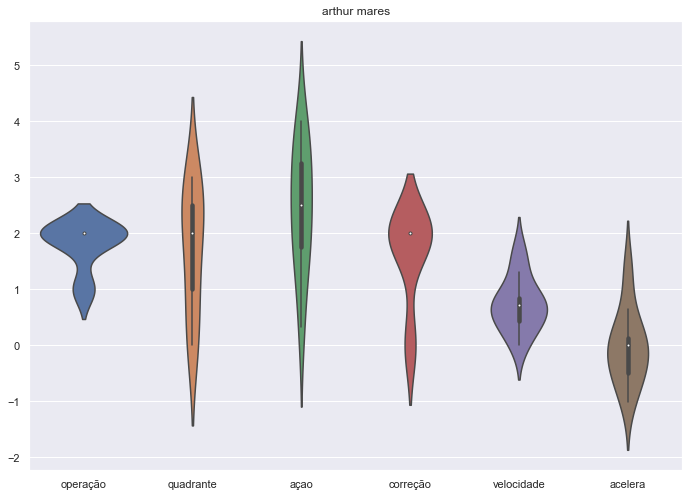

In [200]:
_ = next(vp)

        operação  quadrante       açao   correção  velocidade    acelera
count  15.000000  15.000000  15.000000  15.000000   15.000000  15.000000
mean    1.733333   1.566667   2.600000   1.266667    0.379417  -0.028497
std     0.457738   1.032796   0.837608   0.883715    0.388367   0.550061
min     1.000000   0.000000   1.333333   0.000000    0.000000  -0.984300
25%     1.500000   0.750000   2.000000   0.500000    0.147125  -0.345150
50%     2.000000   1.500000   2.666667   2.000000    0.272400  -0.027700
75%     2.000000   2.500000   3.166667   2.000000    0.450450   0.059700
max     2.000000   3.000000   4.000000   2.000000    1.472800   1.317100


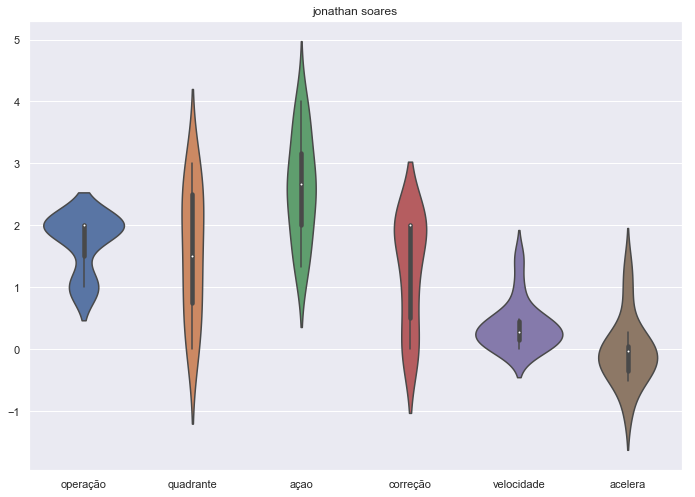

In [201]:
_ = next(vp)

        operação  quadrante       açao   correção  velocidade    acelera
count  20.000000  20.000000  20.000000  20.000000   20.000000  20.000000
mean    1.500000   1.250000   2.683333   0.900000    1.314968  -0.031593
std     0.512989   1.019546   0.901428   0.967906    1.200684   1.774227
min     1.000000   0.000000   1.000000   0.000000    0.000000  -3.784850
25%     1.000000   0.500000   2.000000   0.000000    0.500250  -0.929200
50%     1.500000   0.750000   2.666667   0.500000    1.056075  -0.012750
75%     2.000000   2.125000   3.333333   2.000000    1.708050   0.608150
max     2.000000   3.000000   4.000000   2.000000    4.763350   4.210750


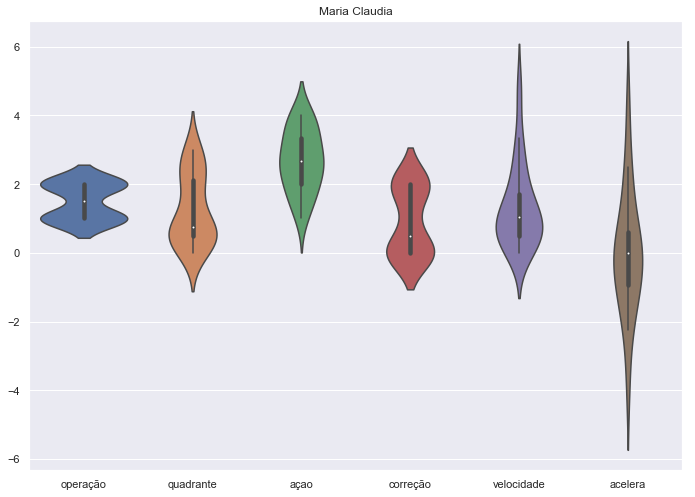

In [202]:
_ = next(vp)

       operação  quadrante      açao  correção  velocidade   acelera
count       8.0   8.000000  8.000000       8.0    8.000000  8.000000
mean        2.0   2.125000  2.833333       2.0    0.692306 -0.028337
std         0.0   0.790569  0.816497       0.0    0.560512  0.640944
min         2.0   1.000000  1.666667       2.0    0.000000 -1.123550
25%         2.0   1.750000  2.250000       2.0    0.456338 -0.124500
50%         2.0   2.250000  2.833333       2.0    0.594800 -0.051000
75%         2.0   2.625000  3.416667       2.0    0.722113  0.007013
max         2.0   3.000000  4.000000       2.0    1.941850  1.251800


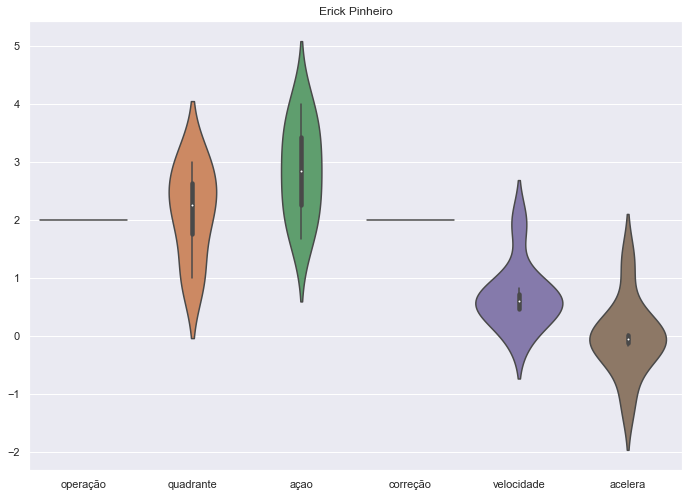

In [203]:
_ = next(vp)

        operação  quadrante       açao   correção  velocidade    acelera
count  17.000000  17.000000  17.000000  17.000000   17.000000  17.000000
mean    1.764706   1.852941   2.627451   1.235294    1.008832  -0.038529
std     0.437237   1.042304   0.873072   0.831370    0.582691   0.683404
min     1.000000   0.000000   1.000000   0.000000    0.000000  -1.099000
25%     2.000000   1.000000   2.000000   1.000000    0.664050  -0.206500
50%     2.000000   2.000000   2.666667   1.000000    0.884800  -0.137900
75%     2.000000   2.500000   3.333333   2.000000    1.396200   0.258000
max     2.000000   3.000000   4.000000   2.000000    2.527000   1.755050


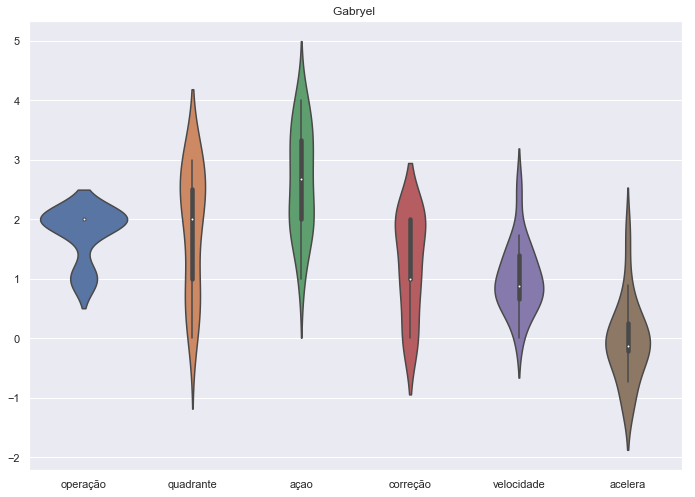

In [204]:
_ = next(vp)

        operação  quadrante       açao   correção  velocidade    acelera
count  11.000000  11.000000  11.000000  11.000000   11.000000  11.000000
mean    1.727273   1.681818   2.636364   1.454545    1.362645   0.110100
std     0.467099   1.006795   0.795188   0.934199    1.329496   2.004752
min     1.000000   0.500000   1.666667   0.000000    0.000000  -2.806900
25%     1.500000   0.750000   2.000000   1.000000    0.476950  -1.077375
50%     2.000000   2.000000   2.666667   2.000000    0.886700   0.000000
75%     2.000000   2.500000   3.166667   2.000000    1.840675   1.038625
max     2.000000   3.000000   4.000000   2.000000    3.862400   3.352800


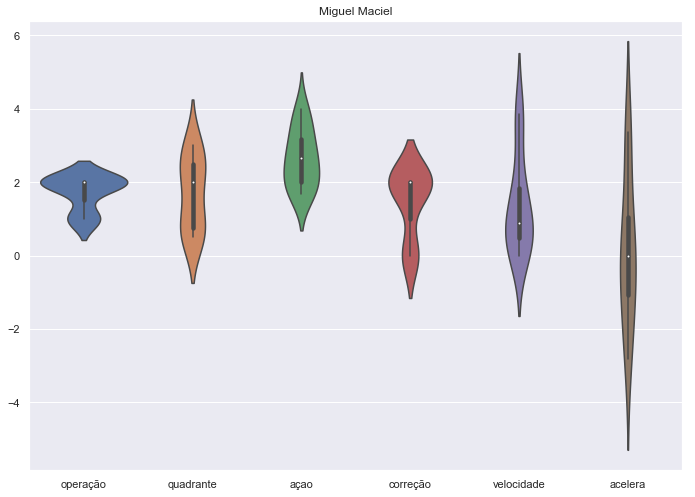

In [205]:
_ = next(vp)